In [116]:
import sys 
import os
import pandas as pd
import numpy as np 
import seaborn as sns

In [117]:
home_dir = !echo $HOME

In [ ]:
os.chdir(f'{home_dir[0]}/PhytoOracle/FlirIr/individual_thermal_out/')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/emmanuelgonzalez/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-9df57f8a6b56>", line 1, in <module>
    os.chdir(f'{home_dir[0]}/PhytoOracle/FlirIr/individual_thermal_out/')
FileNotFoundError: [Errno 2] No such file or directory: 'shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory/PhytoOracle/FlirIr/individual_thermal_out/'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/emmanuelgonzalez/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (

In [113]:
def prepare_df():
    df = pd.read_csv('./individual_temps.csv')\
        .set_index('plot')\
        .drop(['min_x', 'max_x', 'min_y', 'max_y', 'nw_lat', 'nw_lon', 'se_lat', 'se_lon'], axis=1)

    fb = pd.read_csv('./Gantry_fieldbook_2020_Revised_Irr_TRT.csv')\
        .drop(['Experiment', 'SbEMS_ID', 'Harvest_Id', 'PI_check', 'Unnamed: 13', 'Unnamed: 14'], axis=1)\
        .set_index('Plot')

    df = fb.join(df).dropna().convert_dtypes()
    df['median'] = df['median'] - 273.15
    
    return df 

In [114]:
df = prepare_df()

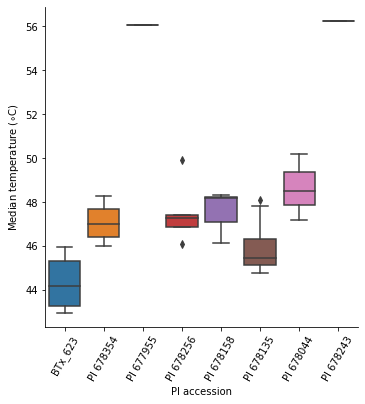

In [115]:
g = sns.catplot(x='PI_accession',
                y='median',
                kind='box',
                data=df)

g.set_axis_labels( "PI accession" , "Median temperature ($\circ$C)" )
g.set_xticklabels(rotation=60)